<a href="https://colab.research.google.com/github/kipsangchepesa/TheFocus/blob/main/The_Focus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.) a.) Defining the question

Given health indicators such as physical health, cholestrol level, BMI(body mass index), alcohol consumption and other variables we would like to build predictive model that determines if a patient is has diabetes orhas no diabetes using the health indicators provided in the dataset.



Specifying the question

1. To identify risk factors are most predictive of diabetes risk.

2. Is a High BP a good indicator of Diabetes

3. Is a High Cholesterol a good indicator of Diabetes

4. Is a patient with high BMI likely to have diabetes

5. Is a patient who has Cholesterol problems likely to have diabetes


##1. b. Defining the metrics of success

Our success will be to determined if a patient is diabetic or not diabetic with minimal error in **classification**.

##1. c. Understanding the context

Diabetes is a serious, chronic disease that occurs either when the pancrease does not produce enough insulin (a hormone that regulates blood sugar, or glucose), or when the body cannot effectively use the insulin it produces. 
Diabetes is an important public health problem, one of four priority noncommunicable diseases(NCDs) targeted for action by world leaders. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades.

Globally, an estimated 422 million adults were living with diabetes in 2014, compared to 108 million in 1980.
The global prevalence (age-standardized) of diabetes has nearly doubled since 1980, rising from 4.7% to
8.5% in the adult population. This reflects an increase in associated risk factors such as being overweight or
obese. Over the past decade, diabetes prevalence has risen faster in low- and middle-income countries than
in high-income countries.

##1. d. Experimental Design

This project will involve review and cleaning of the dataset while performing exploratory data analysis of the dataset. 
The main objective, is to predict if a patient is diabtic or not given health indicators. We wil do model optimization using different training and testing parameters with other optimization techiques that are fit for the model used. We Will do hyperparameter tuning to obtain the best estimator and finally provide further recomendation on how to improve the classifier into the best model.

##1. e. Data Relevance

The data we have is relevant for analysis since it is from Behavioral Risk Factor Survaillance Survailance System (BRFSS2015). It was established in the year 1984 to **collect** data about USA residents on their health related risk behaviours, chronic conditions and use of preventive services.

#2.) Reading the Data

##2. a. Importing libraries 

In [114]:
import pandas as pd
import numpy as np#For working with numbers 
from scipy import stats#for statistic
import seaborn as sns# for visualization 
import matplotlib.pyplot as plt#for plotting 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder#for encoding 
from sklearn.preprocessing import StandardScaler#for scaling 
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
plt.style.use("Solarize_Light2")

# from google.colab import data_table
# data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings("ignore")#to remove warning on deprecated lines of codes 

###Loading the dataset


In [115]:
df=pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


##2. b. Exploring the dataset

In [116]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [117]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


checking the  dataset

In [118]:
# Cheking the shape of the dataset
print('The dataset has ',df.shape[0],' rows and ',df.shape[1],' Columns.')


The dataset has  70692  rows and  22  Columns.


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [120]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [121]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [122]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [123]:
#Unique values in each attribute
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [124]:
#Previewing simple statistics in our dataset
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#3. External data validation.

The dataset is from Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. It was originally uploaded in Kaggle in the year 2015. 

#4.) Tidying the dataset

##Cleaning Dataset

####Checking for null values

In [125]:
#checking for null value
df.isna().sum() 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values 

In [126]:
# Checking for the data types
print('It also has the following datatypes: ', df.dtypes)


It also has the following datatypes:  Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [127]:
# converting the columns values from float to integer
df = df.astype(int)
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

### checking for duplicates


In [128]:
df.duplicated().sum()

1635

###Checking for outliers

In [129]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<function matplotlib.pyplot.show>

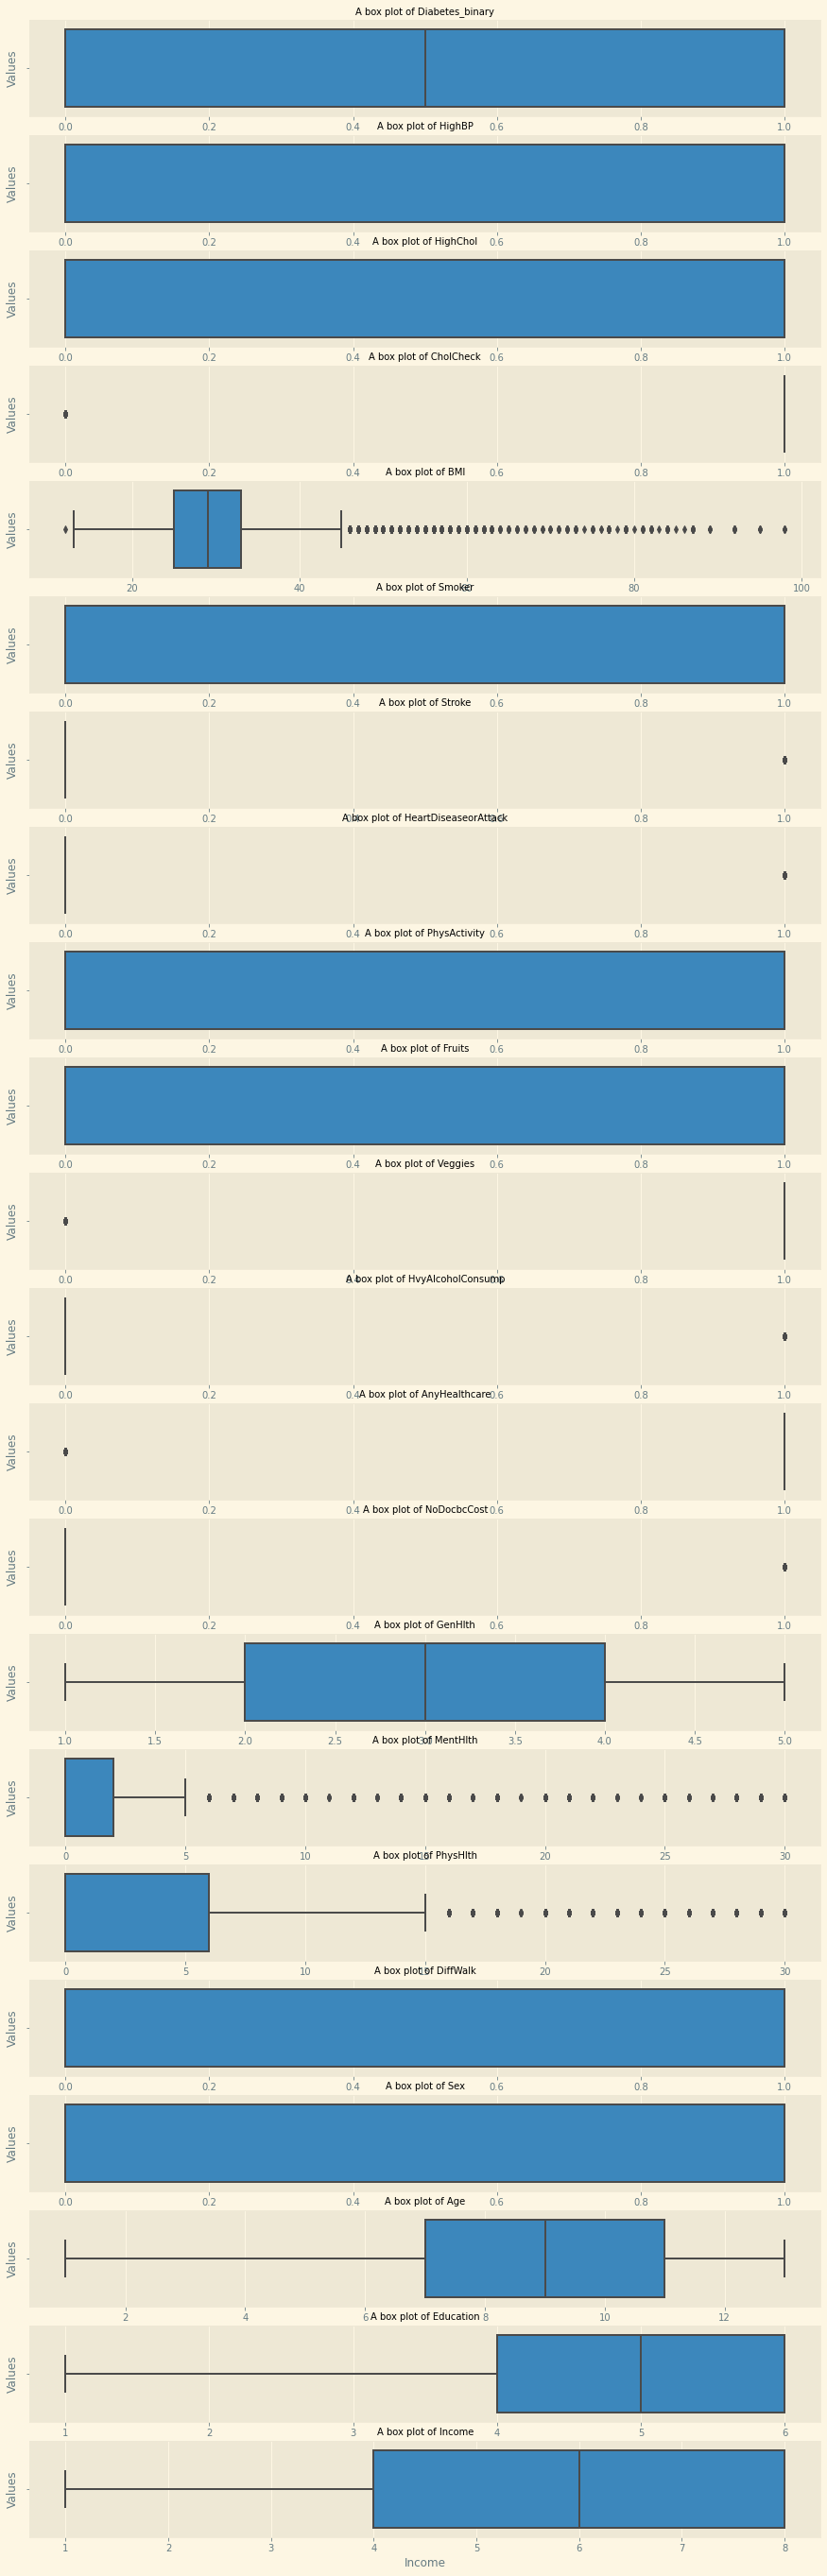

In [130]:
# Checking for outliers
cols=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
fig,ax=plt.subplots(len(cols),figsize=(15,49))
for i,col_vals in enumerate(cols):
  sns.boxplot(x=df[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show

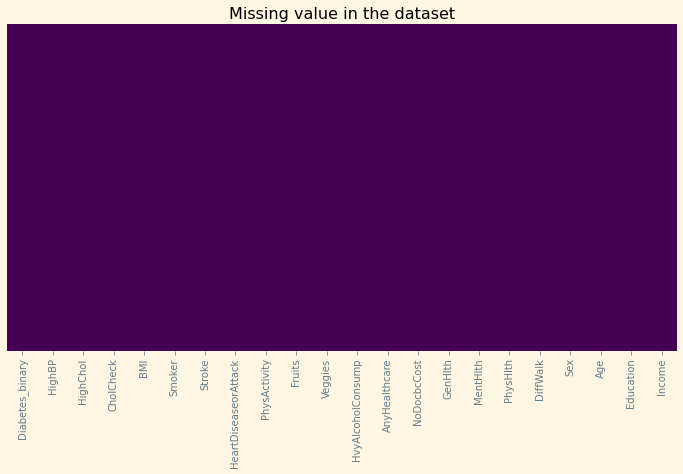

In [131]:
# Checking for missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
# There are no missing values in the dataset

In [132]:
# Checking for the data types
print('It also has the following datatypes: ', df.dtypes)
# converting the columns values from float to integer
df = df.astype(int)
df.dtypes

It also has the following datatypes:  Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

#5.) Exploratory Data Analysis

####a). Univariate analysis

In [133]:
# A brief description of the dataset 
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [134]:
# Checking skewness and kurtosis
dist=pd.DataFrame({'Skewness':df.skew(),'Kurtosis':df.kurt()},index=df.columns)
dist

,Skewness,Kurtosis
Diabetes_binary,0.000000,-2.000057
HighBP,-0.255908,-1.934566
HighChol,-0.102950,-1.989457
CholCheck,-6.119271,35.446486
BMI,1.719180,7.164081
Smoker,0.099031,-1.990249
Stroke,3.626499,11.151808
HeartDiseaseorAttack,1.984703,1.939102
PhysActivity,-0.888732,-1.210190
Fruits,-0.458804,-1.789549


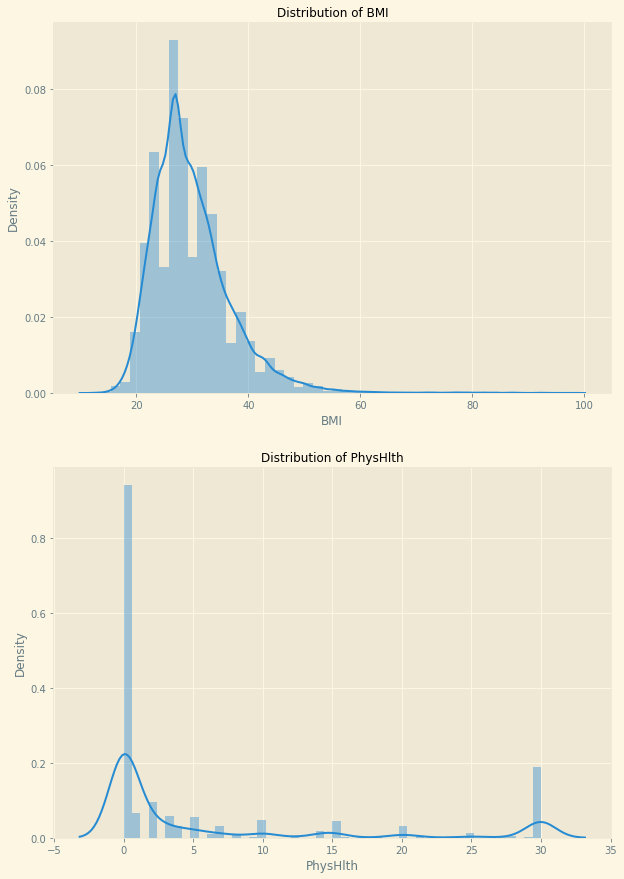

In [135]:
# Getting the distribution of continous variables.
my_cols=['BMI','PhysHlth']
fig,ax=plt.subplots(len(my_cols),figsize=(10,15))
for i,cols in enumerate(my_cols):
  sns.distplot(df[cols],ax=ax[i],kde=True)
  ax[i].set_title('Distribution of '+format(cols),fontsize=12)

	
BMI is slightly positively skewed and it follows a normal distribution since we have many respondents with normal weight as expected in real life situation.

-The distribution of physical health is concentrated around zero meaning many respondents were physically healthy and its also positively skewed with a large number of respondents having there physical health not good through out the month that is for the last 30 days.

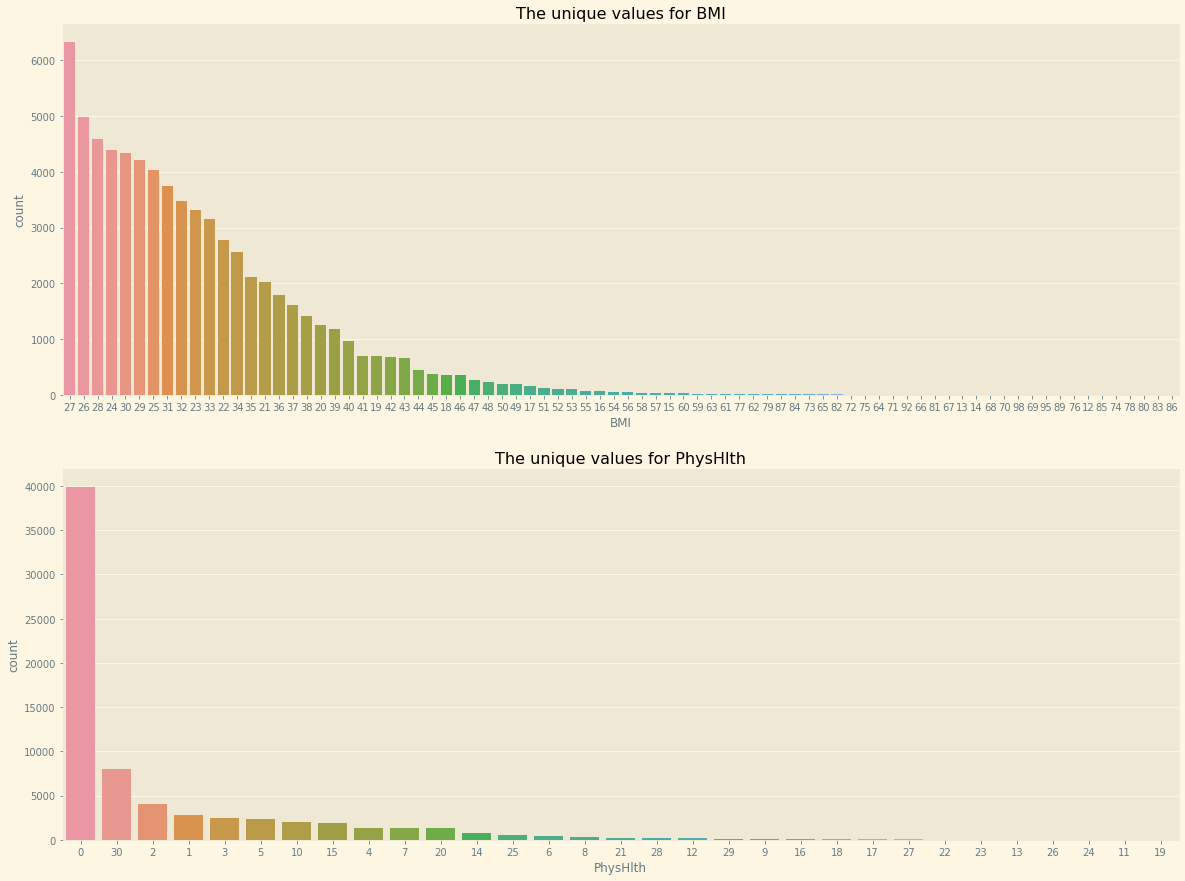

In [136]:
# Using 
ordinal=['BMI','PhysHlth']
fig,ax=plt.subplots(len(ordinal),figsize=(20,15))
for i,cols in enumerate(ordinal):
  sns.countplot(df[cols],order=df[cols].value_counts().index,ax=ax[i])
  ax[i].set_title('The unique values for '+format(cols))

##b.) Bivariate Analysis

###Using heatmap

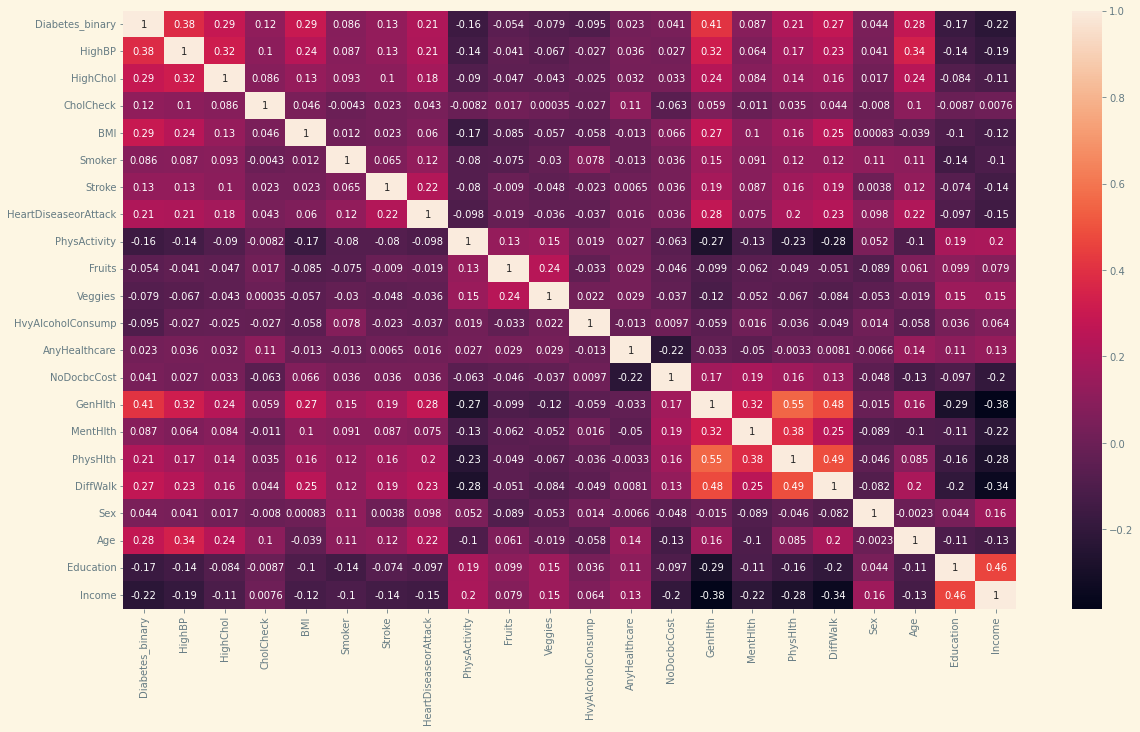

In [137]:
# Observing the relationship within the dataset.
corr=df.corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,  annot=True)
sns.color_palette("mako", as_cmap=True)
plt.show()

###Using barplots

In [138]:
def barplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data, palette='Oranges_r')
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

Diabetes_binary

0 - no Diabetes

1- has diabetes

HighBP

0 -no HighBP

1 - HighBP

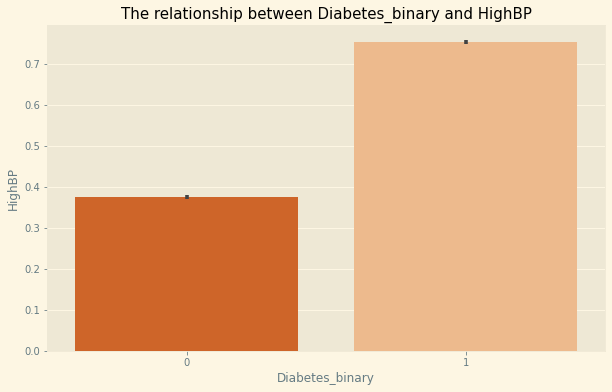

In [139]:
barplots(df,'Diabetes_binary', 'HighBP')

- most respondents with High blood pressure  have Diabetes

SMOKER
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 

0 = no 

1 = yes

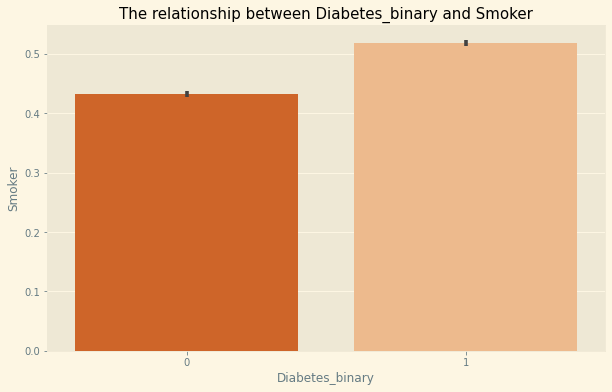

In [140]:
barplots(df,'Diabetes_binary','Smoker')

- of the respondents  majority  of those who smoke  have  Diabetes while those who  have not smokers or less smoker have small number with diabetes

HvyAlcoholConsump (adult men >=14 drinks per week and adult women>=7 drinks per week) 
  
  0 = no 
  
  1 = yes

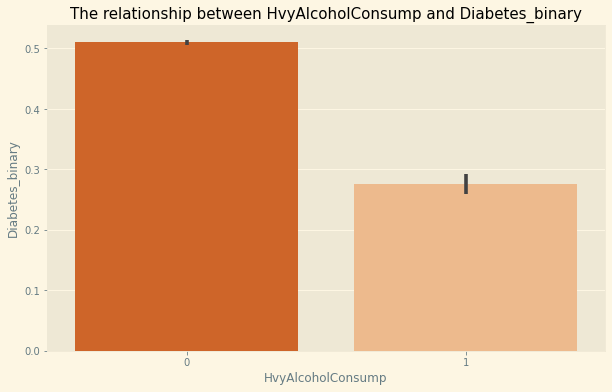

In [141]:
barplots(df, 'HvyAlcoholConsump','Diabetes_binary',)

from above  we can  deduce that  respondents  with HvyAlcoholConsump have low number of diabetes cases as compared to  non-HvyAlcoholConsump repondents where most respondents have diabetes

SEX

0- female

1- male

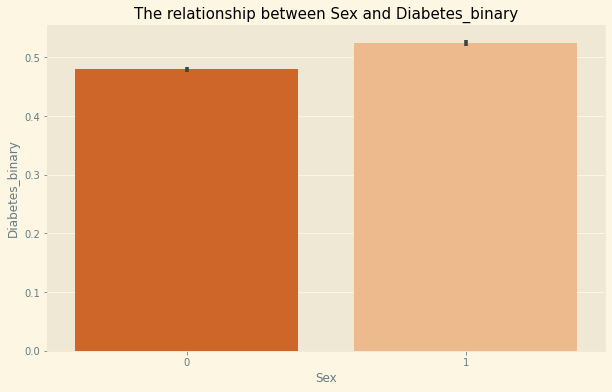

In [142]:
# sex vs Diabetes_binary
barplots(df,'Sex','Diabetes_binary')

- a high  number  of male respondents are  diabetic  as compared to female trespondents.

high cholesterol

0 = no high cholesterol 

1 = high cholesterol

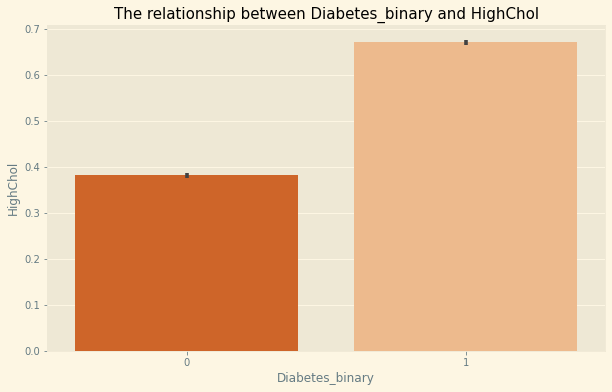

In [143]:
#
barplots(df,'Diabetes_binary','HighChol')

- most repondets with high cholestrol level have diabetes meaning high cholestrol level  pose higher risk of one being diabetic.

FRUITS : Consume Fruit 1 or more times per day 

0 = no 

1 = yes

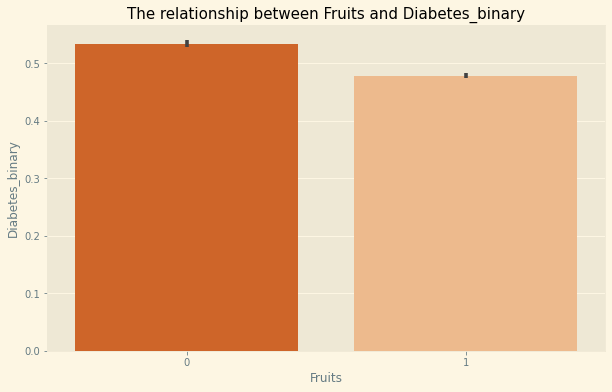

In [144]:
barplots(df,'Fruits','Diabetes_binary',)

- The respondets who  do not consume fruits  have  hogher risk of getting diabetes than consuming fruits.

Veggies : Consume Vegetables 1 or more times per day 

0 = no 

1 = yes

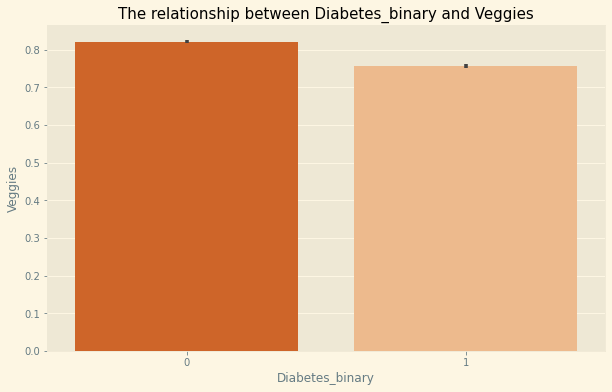

In [145]:
barplots(df,'Diabetes_binary','Veggies')


- from above  plot we can  conclude that  most of the respondets who do not consume veggetables  have diabetes  than those who consume veggetables.

Ment Hlth
days of poor mental health scale 1-30 days

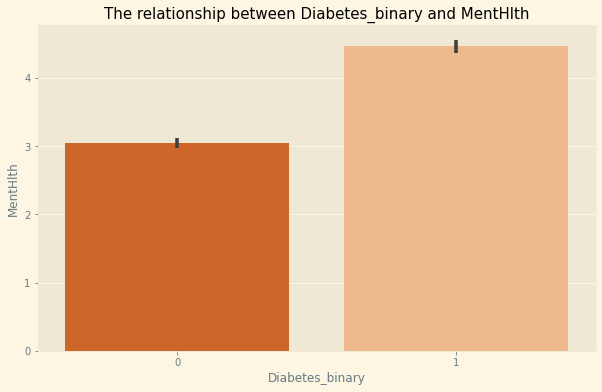

In [146]:
barplots(df,'Diabetes_binary','MentHlth')

a larger number of respondents  with  mental health issues have  diabetes while just a few of those without mental healtf have diabetes.

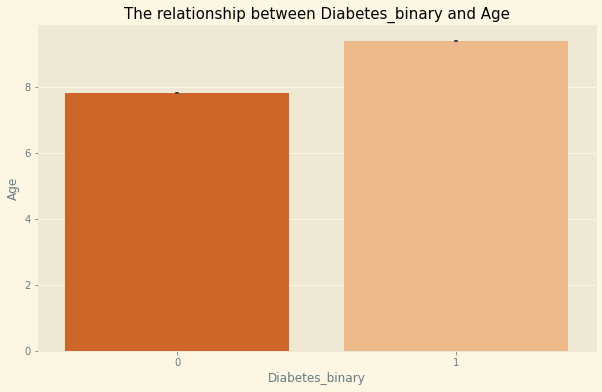

In [147]:
barplots(df,'Diabetes_binary','Age')

- most adults  have diabetes than the young people.

Education level  scale 1-6 
1 = Never attended school or only kindergarten

2 = elementary 

3 = highschool dropout

4 = highschool graduate

5 = some years in college 1 to 3yrs

6 = college graduate

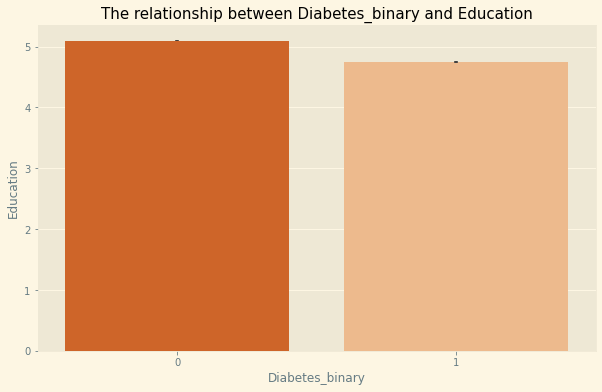

In [148]:
barplots(df,'Diabetes_binary','Education')

education level can be a factor  have a slight contribution to one having diabetes .

PhysHlth
physical illness or injury days in past 30 days scale 1-30

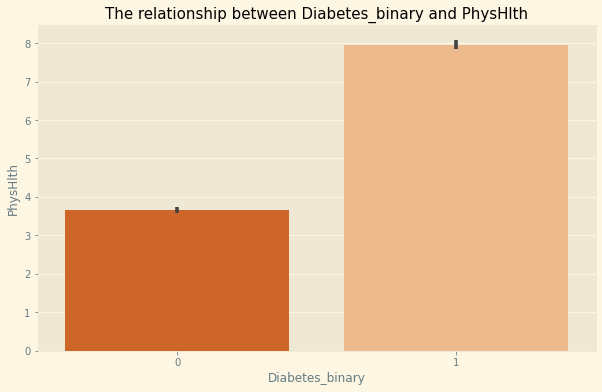

In [149]:
barplots(df,'Diabetes_binary','PhysHlth',)

-most of the respondents with physical illness and injury within the 30day scale  have  diabetes , that is to s ay one with higher  cases of physical health have high chance of being diabetic.

Income
Income scale of 1 to 8 

1 = less than $10,000

 5 = less than $35,000 
 
 8 = $75,000 or more

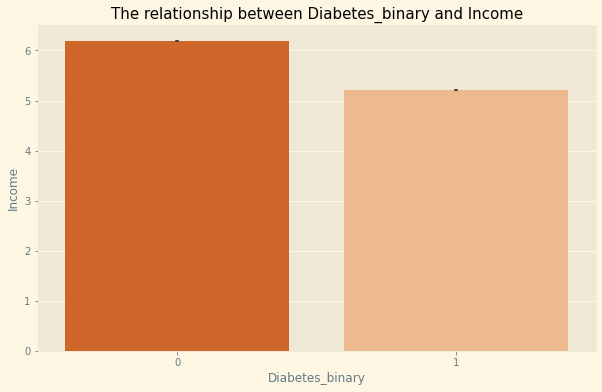

In [150]:
barplots(df,'Diabetes_binary','Income')

most of respondents without diabetes have high incomes while those without diabetes have slightly lower incomes.

Stroke - Ever had  stroke case.

 0 = no 
 
 1 = yes

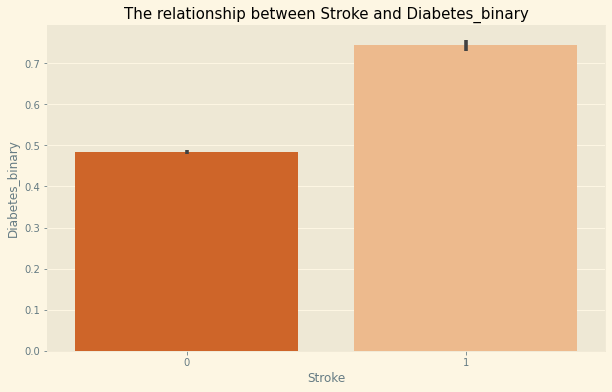

In [151]:
barplots(df,'Stroke','Diabetes_binary')

most  respondets with cases of stroke have diabetes as compared with those with no stroke cases.

PhysActivity 
: having done physical activity in past 30 days - not including job

 0 = no 
 
 1 = yes

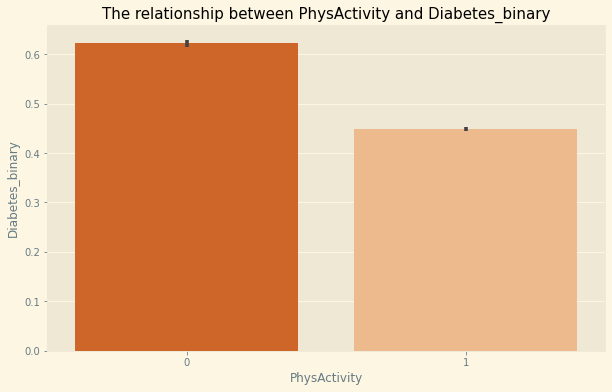

In [152]:
barplots(df,'PhysActivity','Diabetes_binary')

- of the respondetnts who have  done physical activity in the past 30days only a small number have diabetes but fo those who have not done any physical activity most of them have  diabetes.

DiffWalk
Do you have serious difficulty walking or climbing stairs?

 0 = no
 
 1 = yes

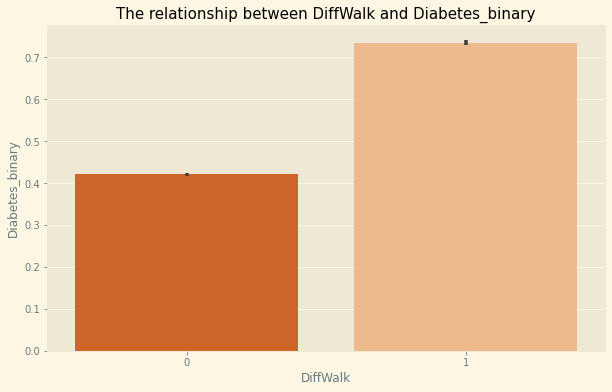

In [153]:
barplots(df,'DiffWalk','Diabetes_binary')

most of those with difficulty in walking and climbing  have  diabetes in comparison to those with no difficulty, this  mean when an individual has  the diffwalk there is higher chance of he or she having diabetes.

HeartDiseaseorAttack

 have coronary heart disease (CHD) or myocardial infarction (MI) 
 
 0 = no 
 
 1 = yes

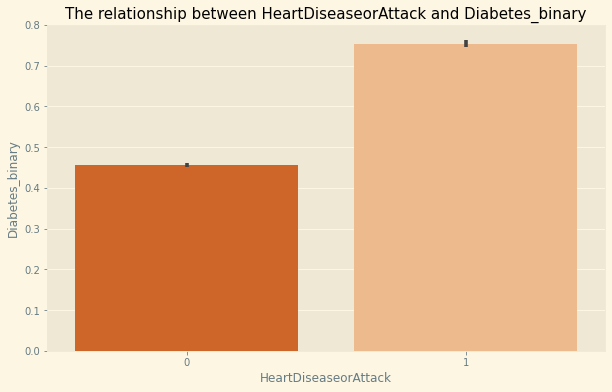

In [154]:
barplots(df,'HeartDiseaseorAttack','Diabetes_binary')

Most of the respondets with HeartDiseaseorAttack have  diabetes.

GenHlth
Would you say that in general your health is: scale 1-5 

1 = excellent 

2 = very good 

3 = good 

4 = fair 

5 = poor

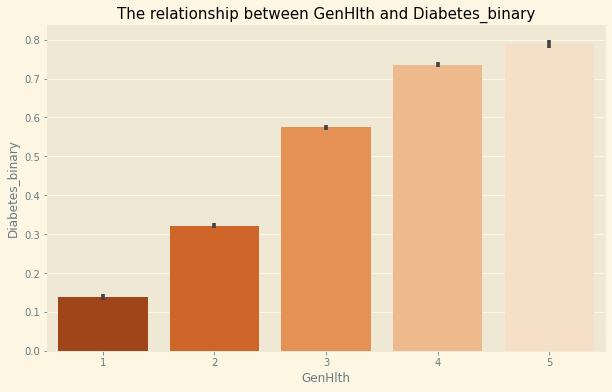

In [155]:
barplots(df,'GenHlth','Diabetes_binary')

- the respondents  with  excellent  Genhealth  have few cases of  diabetes  while those with poor GenHealth have  higher cases diabetes. This means that  the General health condition of  an individual is a factor  for diabetes diagnosis.

BMI - Body Mass Index

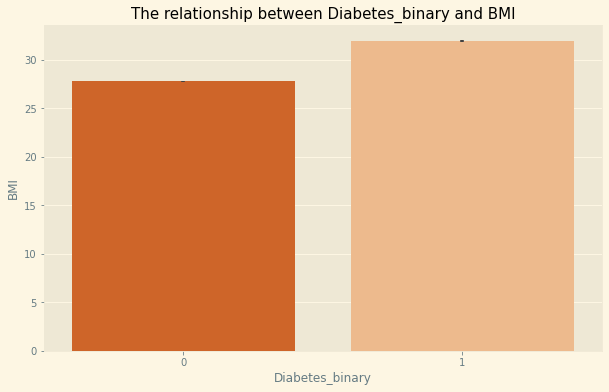

In [156]:
barplots(df,'Diabetes_binary','BMI')

most respondents  with  higher BMI have  diabetes compared to those lower.

AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 

0 = no 

1 = yes

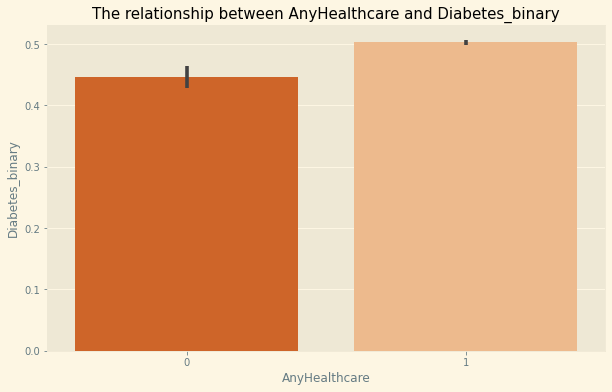

In [157]:
barplots(df,'AnyHealthcare','Diabetes_binary')

majority of respondents with diabetes have Health care coverage  plans comparedd to those without  diabetes

NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

 0 = no
 
 1 = yes

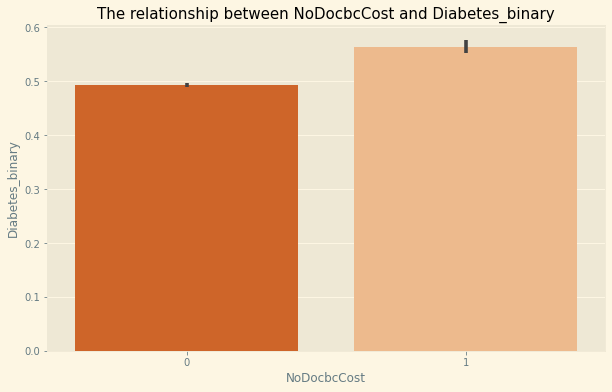

In [158]:
barplots(df,'NoDocbcCost','Diabetes_binary')

- A higher number of the respondents  who had the issue of NoDocbcCost (that is  to say one cannot see a doctor because of cost) had diabetes.

CholCheck
0 = no cholesterol check in 5 years 

1 = yes cholesterol check in 5 years

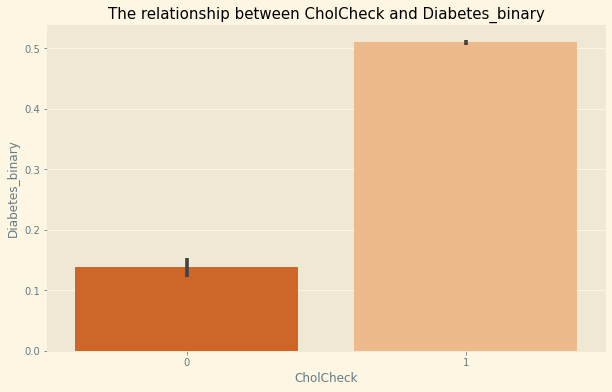

In [159]:
barplots(df,'CholCheck','Diabetes_binary')

- most of those who have  cheked for cholestral level have diabetes which  indicates that  one with cholestrol have high chance of  getting diabetes

###Using cross tabulation

HvyAlcoholConsump      0     1
Diabetes_binary               
0                  33158  2188
1                  34514   832


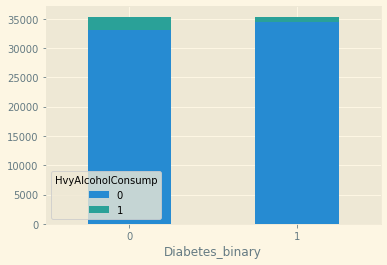

In [160]:
#Cross tabulation between Diabetes_binary and HvyAlcoholConsump
CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['HvyAlcoholConsump'])
print(CrosstabResult)
CrosstabResult.plot.bar(stacked=True, rot=0)


Age               1     2     3     4     5   ...    9     10    11    12    13
Diabetes_binary                               ...                              
0                901  1256  1735  2167  2469  ...  4379  4298  2903  1991  2217
1                 78   140   314   626  1051  ...  5733  6558  5141  3403  3209

[2 rows x 13 columns]


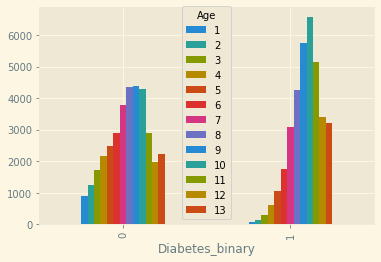

In [161]:
#Cross tabulation between Diabetes_binary and Age
CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['Age'])
print(CrosstabResult)
 
CrosstabResult.plot.bar()

Income              1     2     3     4     5     6     7      8
Diabetes_binary                                                 
0                1228  1412  1989  2604  3506  4996  6160  13451
1                2383  3086  3568  4054  4504  5291  5265   7195


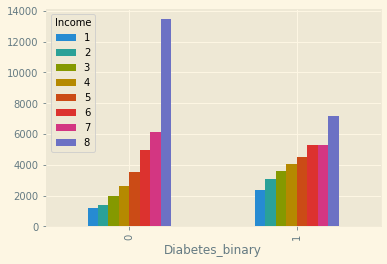

In [162]:
# Cross tabulation between Diabetes_binary and Income
CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['Income'])
print(CrosstabResult)
 
# Grouped bar chart between Diabetes_binary and income
CrosstabResult.plot.bar()

Education         1     2     3      4      5      6
Diabetes_binary                                     
0                28   464  1151   8407   9676  15620
1                47  1183  2296  11066  10354  10400


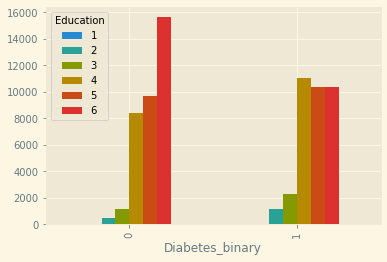

In [163]:
 #Grouped bar chart between Diabetes_binary and Education

CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['Education'])
print(CrosstabResult)
 
# Grouped bar chart 

CrosstabResult.plot.bar()

#6.)DATA MODELLING

###Feature engineering 

##a.) Data Preparation and features extraction

###Splitting the dataset into target and labels 

In [164]:
# Extracting the  target variable
X = df.drop(['Diabetes_binary'], axis=1)

y = df['Diabetes_binary']

#splitting data to train and validation set using 80% as training set and 20% for testing
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=200, shuffle=True, )

##Hyper parameter tunning and model selection 

In [186]:
#using Grisearch cv
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

LInear regression 

In [165]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

This is multivariable linear regression, the regression model has to 
find the most optimal coefficients for all the attributes

In [166]:
regressor.coef_

array([ 1.56292162e-01,  1.06208211e-01,  1.65226072e-01,  1.18271599e-02,
        7.94564427e-05,  2.68111599e-02,  5.07721108e-02, -8.26295855e-03,
       -5.00130079e-03, -9.08862669e-03, -1.18769125e-01,  1.24029765e-02,
       -1.07040478e-04,  1.05577041e-01, -9.33120473e-04, -1.62156876e-03,
        2.57619067e-02,  4.28531143e-02,  2.45579449e-02, -6.45878519e-03,
       -1.10232650e-02])

In [167]:
#converting the array tpo pandas dataframe
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
HighBP,0.156292
HighChol,0.106208
CholCheck,0.165226
BMI,0.011827
Smoker,0.000079
Stroke,0.026811
HeartDiseaseorAttack,0.050772
PhysActivity,-0.008263
Fruits,-0.005001
Veggies,-0.009089


variables with most optimal Coefficients are High Blood Pressure,    High Cholestrol level,    Cholestrol Check and general health

Making prediction

In [168]:
y_pred = regressor.predict(X_valid)

# To compare the actual output values for X_test with the predicted values
# 
Dataframe= pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
Dataframe

,Actual,Predicted
45401,1,0.555387
53828,1,0.323835
23280,0,0.379407
20163,0,-0.022890
14393,0,0.790665
...,...,...
47942,1,0.752046
20598,0,0.437051
32288,0,0.389382
57472,1,0.821063


In [170]:
# Evaluating the Algorithm
# ---
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 0.35242223756288876
Mean Squared Error: 0.17097079945006632
Root Mean Squared Error: 0.41348615387950577


Our mean absolute error is 35% while mean squared error is 17% and root mean squared error is 41%

##Decision tree

In [171]:
#Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_valid)

In [174]:
#Doing predition using our model
print("--------------------TRAINING DATA-----------")

from sklearn.metrics import f1_score,accuracy_score
clf_train_accuracy = accuracy_score(y_train, y_train_pred)
clf_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",clf_train_f1_score*100)
print("Accuracy Score: ",clf_train_accuracy*100)


--------------------TRAINING DATA-----------
F1-Score:  99.48719228336164
Accuracy Score:  99.48720669106855


In [175]:
# validating the model using the testing DataSet
print("--------------------Validating-----------")
clf_test_accuracy = accuracy_score(y_valid, y_test_pred)
clf_test_f1_score=f1_score(y_valid, y_test_pred,average='weighted')
print("F1-Score: ",clf_test_f1_score*100)
print("Accuracy Score: ",clf_test_accuracy*100)

--------------------Validating-----------
F1-Score:  65.2450831784746
Accuracy Score:  65.24506683640993


##Random Forest Classifier

In [176]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_valid)

In [177]:
# training the model using training Data Set
print("--------------------Training the model-----------")
from sklearn.metrics import f1_score,accuracy_score
rfc_train_accuracy = accuracy_score(y_train, y_train_pred)
rfc_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",rfc_train_f1_score*100)
print("Accuracy Score: ",rfc_train_accuracy*100)


--------------------Training the model-----------
F1-Score:  99.48543553420195
Accuracy Score:  99.48543843827913


In [178]:
print("--------------------TESTING THE MODEL-----------")
#using testing Data Set
rfc_test_accuracy = accuracy_score(y_valid, y_test_pred)
rfc_test_f1_score=f1_score(y_valid, y_test_pred,average='weighted')
print("F1-Score: ",rfc_test_f1_score*100)
print("Accuracy Score: ",rfc_test_accuracy*100)


--------------------TESTING THE MODEL-----------
F1-Score:  74.0858470762862
Accuracy Score:  74.12122498055025


##Naive Bayes Classifier

In [179]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_train_pred = GNB.predict(X_train)
y_test_pred = GNB.predict(X_valid)

In [180]:
#Training the model using train Data Set
print("--------------------TRAINING THE MODEL-----------")
from sklearn.metrics import f1_score,accuracy_score
GNB_train_accuracy = accuracy_score(y_train, y_train_pred)
GNB_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",GNB_train_f1_score*100)
print("Accuracy Score: ",GNB_train_accuracy*100)

--------------------TRAINING THE MODEL-----------
F1-Score:  71.88821098337748
Accuracy Score:  71.89185365939915


In [61]:
print("--------------------VALIDATING THE MODEL-----------")
#Testing the model using test Data Set
GNB_test_accuracy = accuracy_score(y_valid, y_test_pred)
GNB_test_f1_score=f1_score(y_valid, y_test_pred,average='weighted')
print("F1-Score: ",GNB_test_f1_score*100)
print("Accuracy Score: ",GNB_test_accuracy*100)

--------------------VALIDATING THE MODEL-----------
F1-Score:  71.41306606928988
Accuracy Score:  71.41967973745261


KNN

In [181]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



kn = KNeighborsClassifier(n_neighbors = 5) 
kn.fit(X_train, y_train)

scores = cross_val_score(kn, X, y, cv=5, scoring = 'accuracy')

prediction = kn.predict(X_valid)

print("Accuracy Scores: ", scores)
print("Average Accuracy: ", scores.mean())

Accuracy Scores:  [0.69467431 0.69693755 0.70632338 0.71028434 0.705899  ]
Average Accuracy:  0.702823714643461


##Neural network

In [182]:
#Neural Network
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

y_train_pred=mlp.predict(X_train)
y_test_pred=mlp.predict(X_valid)

In [183]:
#Training the model using  train Data Set
print("--------------------TRAINING THE MODEL-----------")
from sklearn.metrics import f1_score,accuracy_score
mlp_train_accuracy = accuracy_score(y_train, y_train_pred)
mlp_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",mlp_train_f1_score*100)
print("Accuracy Score: ",mlp_train_accuracy*100)


--------------------TRAINING THE MODEL-----------
F1-Score:  75.00008091802741
Accuracy Score:  75.01281983272328


In [184]:
print("--------------------Validating the model-----------")
#validating using testing Data Set
mlp_test_accuracy = accuracy_score(y_valid, y_test_pred)
mlp_test_f1_score=f1_score(y_valid, y_test_pred,average='weighted')
print("F1-Score: ",mlp_test_f1_score*100)
print("Accuracy Score: ",mlp_test_accuracy*100)

--------------------Validating the model-----------
F1-Score:  75.45709796257302
Accuracy Score:  75.4650258151213


##Ensembling and Stacking all the Classifiers

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('knn',knn),
    ('clf',clf),
    ('rfc',rfc),
    ('GNB',GNB),
    ('mlp',mlp) ]

In [67]:
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [68]:
stack_model.fit(X_train,y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('clf', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('GNB', GaussianNB()),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
                   final_estimator=LogisticRegression())

In [69]:
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_valid)

In [70]:
#Using training Data Set to train the model
print("--------------------TRAINING ThE STACK MODEL-----------")
from sklearn.metrics import f1_score,accuracy_score
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_f1_score=f1_score(y_train, y_train_pred,average='weighted')
print("F1-Score: ",stack_model_train_f1_score*100)
print("Accuracy Score: ",stack_model_train_accuracy*100)

--------------------TRAINING ThE STACK MODEL-----------
F1-Score:  82.4185412997818
Accuracy Score:  82.47986570851958


In [72]:
#validating the model using testing Data Set
print("--------------------Valid Stack model-----------")
stack_model_test_accuracy = accuracy_score(y_valid, y_test_pred)
stack_model_test_f1_score=f1_score(y_valid, y_test_pred,average='weighted')
print("F1-Score: ",stack_model_test_f1_score*100)
print("Accuracy Score: ",stack_model_test_accuracy*100)

--------------------Valid Stack model-----------
F1-Score:  74.65820205668187
Accuracy Score:  74.77508063147174


##Confusion 

Text(69.0, 0.5, 'Truth')

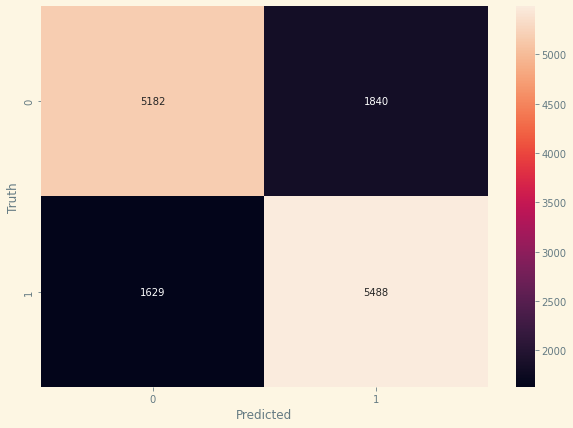

In [185]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,y_test_pred)
import  seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')